<a href="https://colab.research.google.com/github/hafedh-hichri/Deep-Learning/blob/main/Brain_tumor_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# downloading the dataset

In [1]:
!git clone https://github.com/hafedh-hichri/Deep-Learning.git
!unzip ./Deep-Learning/datasets/brain\ tumor\ classification.zip  -d ./ 
!rm -rf ./Deep-Learning/

Cloning into 'Deep-Learning'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 16 (delta 4), reused 5 (delta 1), pack-reused 0
Unpacking objects: 100% (16/16), 8.10 MiB | 9.99 MiB/s, done.
Archive:  ./Deep-Learning/datasets/brain tumor classification.zip
  inflating: ./brain tumor classification/no/no.jpg  
  inflating: ./brain tumor classification/no/3 no.jpg  
  inflating: ./brain tumor classification/no/31 no.jpg  
  inflating: ./brain tumor classification/no/no 99.jpg  
  inflating: ./brain tumor classification/no/5 no.jpg  
  inflating: ./brain tumor classification/no/N2.JPG  
  inflating: ./brain tumor classification/no/33 no.jpg  
  inflating: ./brain tumor classification/no/No16.jpg  
  inflating: ./brain tumor classification/no/27 no.jpg  
  inflating: ./brain tumor classification/no/No15.jpg  
  inflating: ./brain tumor classification/no/N15.jpg  
  inflating: ./brain tumor cl

## sample images

NO

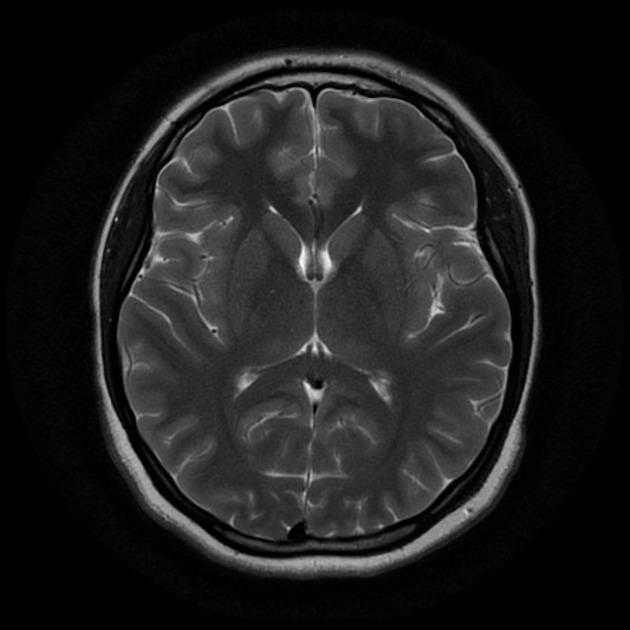

YES

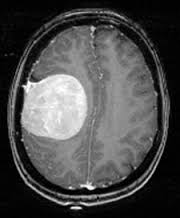

# importing the necessary libraries 

In [2]:
import tensorflow as tf
from keras.layers import Dense , Conv2D , MaxPooling2D , Flatten
from keras.models import Sequential 
from keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np  
import matplotlib.pyplot as plt 

# loading the dataset into our python code 

In [3]:
generator = ImageDataGenerator(1.0/255,
                         validation_split=0.2)

train = generator.flow_from_directory('brain tumor classification',
                                      target_size=(150,150),
                                      subset='training')

validation = generator.flow_from_directory('brain tumor classification',
                                      target_size=(150,150),
                                      subset='validation')

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [4]:
train.class_indices

{'no': 0, 'yes': 1}

# creating the AI model

In [5]:
model = Sequential([
    Conv2D(32,3,activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(),
    Conv2D(64,2,activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(1400,activation='relu'),
    Dense(2,activation='softmax')
])

In [6]:
model.compile('adam','categorical_crossentropy',metrics=['acc'])

In [7]:
model.fit(train,epochs=10,validation_data=validation)

/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/10
7/7 [==============================] - 18s 192ms/step - loss: 3842.3152 - acc: 0.5517 - val_loss: 293.3900 - val_acc: 0.6200
Epoch 2/10
7/7 [==============================] - 1s 122ms/step - loss: 126.9410 - acc: 0.5961 - val_loss: 89.3454 - val_acc: 0.7000
Epoch 3/10
7/7 [==============================] - 1s 123ms/step - loss: 46.1897 - acc: 0.7882 - val_loss: 56.9887 - val_acc: 0.6200
Epoch 4/10
7/7 [==============================] - 1s 122ms/step - loss: 20.9408 - acc: 0.7635 - val_loss: 21.7382 - val_acc: 0.7800
Epoch 5/10
7/7 [==============================] - 1s 109ms/step - loss: 4.6384 - acc: 0.9113 - val_loss: 8.3831 - val_acc: 0.7200
Epoch 6/10
7/7 [==============================] - 1s 127ms/step - loss: 2.0675 - acc: 0.8818 - val_loss: 9.7217 - val_acc: 0.8000
Epoch 7/10
7/7 [==============================] - 1s 125ms/step - loss: 0.7765 - acc: 0.9409 - val_loss: 7.6830 - val_acc: 0.8200
Epoch 8/10
7/7 [==============================] - 1s 116ms/step - loss: 0.017

# using the AI 

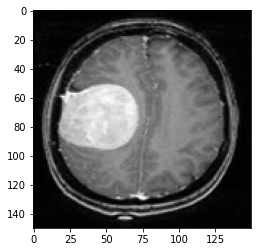

In [8]:
# importing image 
bgr_img = cv2.imread('/content/brain tumor classification/yes/Y1.jpg')
img = cv2.cvtColor(bgr_img,cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img,(150,150))
img_rescaled = img_resized/255
plt.imshow(img_rescaled)

In [9]:
# predicting the image label 
new_input = img_rescaled.reshape(1,150,150,3)
label = model.predict(new_input)
np.argmax(label)

1/1 [==============================] - 0s 228ms/step


1

In [10]:
train.class_indices

{'no': 0, 'yes': 1}